# Análisis exploratorio de los datos

![Mineria de datos](data-mining.jpg  "Metodología proyectos de minería") 

<center>
(Fuente:https://www.proglobalbusinesssolutions.com/six-steps-in-crisp-dm-the-standard-data-mining-process/)
</center>

La recopilación inicial de datos y cifras se realiza a partir de todas las fuentes disponibles. En la fase para **entender los datos** se examinan las propiedades del set de datos que se tiene. Luego, la calidad de la información se verifica mediante respuestas a ciertas preguntas relevantes sobre la integridad y precisión del material.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de datos

In [2]:
# Carga de datos
data_frame = pd.read_csv("Churn_Modelling.csv")
data_frame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Consideraciones

1. El set de datos está formado por filas y columnas. Las filas corresponden a las observaciones y las columnas son las características (features, variables). 

2. Cada característica puede ser numérica o catgórica; particularmente, muchos algoritmos requieren que las columnas con las cuales se quiere trabajar deben ser numéricas. Lo anterior lleva a un proceso, eventualmente, de transformación de los datos.

## Es hora de comenzar con la exploración de los datos ...

## Tamaño del dataset

In [3]:
data_frame.shape

(10000, 14)

## Tipos de datos de las columnas

In [4]:
# Revisión de los tipos de datos
data_frame.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Tratamiento de valores nulos

In [5]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de RowNumber = 0
Total de valores nulos de CustomerId = 0
Total de valores nulos de Surname = 0
Total de valores nulos de CreditScore = 0
Total de valores nulos de Geography = 0
Total de valores nulos de Gender = 0
Total de valores nulos de Age = 0
Total de valores nulos de Tenure = 0
Total de valores nulos de Balance = 0
Total de valores nulos de NumOfProducts = 0
Total de valores nulos de HasCrCard = 0
Total de valores nulos de IsActiveMember = 0
Total de valores nulos de EstimatedSalary = 0
Total de valores nulos de Exited = 0


### Técnicas de tratamiento de nulos

1. Eliminar las observaciones (opción simple)
2. Imputación (mejor opción). Acá se rellenan los valores vacíos con algún valor, puede ser el promedio del valor de la columna. Puede ser el valor más repetido en el caso de una variable categórica.
3. Una extensión de la imputación. Se agrega una columna indicando que el valor ha sido reemplazado, de esta forma, se mantiene "identificados" a los valores nulos

## Exploración de valores 
### Algunas estadísticas

In [6]:
data_frame.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


La función anterior obtiene las estadísticas de 11 columnas (en este caso hay 14), aparecen solo esas 11 porque son las columnas numéricas.

La interpretación (considerando la columa Age):

1. Hay 10.000 valores en la columna
2. El promedio corresponde a 38.92
3. La desviación estándar es de 10.49, lo que quiere decir, la edad de las observaciones varía dentro del intervalo [28.43, 49.41] [mean - std; mean + std]
4. Valor mínimo de la columna es 18
5. El 25% de las observaciones es menor a 32
6. El 50% de las observaciones es menor a 37
7. El 75% de las observaciones es menor a 44
8. El valor máximo de la columna es 92

### Una alternativa

Lo anterior igual se puede lograr de forma individual

In [7]:
print('Mínimo:',data_frame['Age'].min())
print('Máximo:',data_frame['Age'].max())
print('Promedio:',data_frame['Age'].mean())
print('STD:',data_frame['Age'].std())
print(data_frame.Age.quantile([.25, .5, .75]))
print('*******')
print('Mínimo:',min(data_frame['Age']))
print('Máximo:',max(data_frame['Age']))

Mínimo: 18
Máximo: 92
Promedio: 38.9218
STD: 10.487806451704609
0.25    32.0
0.50    37.0
0.75    44.0
Name: Age, dtype: float64
*******
Mínimo: 18
Máximo: 92


In [8]:
# Para considerar las otras columnas
data_frame.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
# Considerando solo las columnas de tipo object
data_frame.describe(include=[np.object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Columnas que aportan valor

En todo set de datos siempre hay columnas que no aportan porque, muchas veces, tienen que ver con identificadores dentro del negocio. En este caso las columnas que se van a descartar por el poco aporte predictivo son:

+ RowNumber
+ CustomerId
+ Surname

In [3]:
eliminadas = ['RowNumber','CustomerId','Surname']
data_frame = data_frame.drop(eliminadas, axis = 'columns')
data_frame.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Guarda los datos limpios para usarlos en la siguiente sesión
data_frame.to_csv('Churn_Modelling_Clean.csv', index=False)

## Agrupaciones de datos 

In [4]:
# Total de observaciones por género
data_frame.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
# Total de observaciones por género y país (Geography)
data_frame.groupby('Gender')['Geography'].value_counts()

Gender  Geography
Female  France       2261
        Germany      1193
        Spain        1089
Male    France       2753
        Spain        1388
        Germany      1316
Name: Geography, dtype: int64

In [17]:
# Total de observaciones por género y país (Geography)
data_frame.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100601.541382
Male       99664.576931
Name: EstimatedSalary, dtype: float64

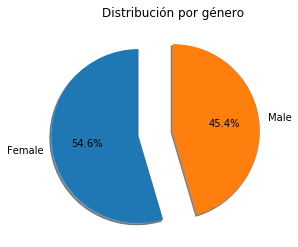

In [18]:
tipos = data_frame['Gender'].unique()
total = data_frame['Gender'].value_counts().tolist()
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0] # Destacar algunos 
plt.pie(total, labels=tipos, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Distribución por género')
plt.show()

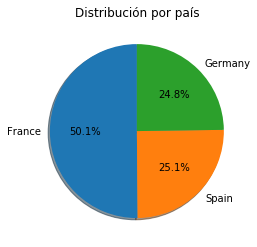

In [20]:
tipos = data_frame['Geography'].unique()
total = data_frame['Geography'].value_counts().tolist()
plt.pie(total, labels=tipos, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Distribución por país')
plt.show()

## Gráficos de barras

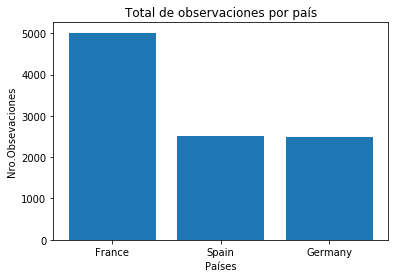

In [6]:
def getGraficoBarras(label_x, label_y, title, feature):
    x_values = data_frame[feature].unique()
    y_values = data_frame[feature].value_counts().tolist()
    plt.bar(x_values, y_values)
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

getGraficoBarras('Países', 'Nro.Obsevaciones', "Total de observaciones por país", 'Geography')

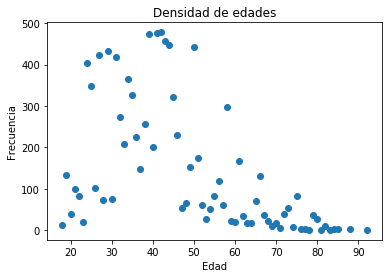

In [22]:
# Gráfico de densidad de edades

x_values = data_frame.Age.unique()
y_values = data_frame.Age.value_counts().tolist()
plt.scatter(x_values, y_values, marker='o');
#plt.plot(x_values, y_values)
plt.title('Densidad de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

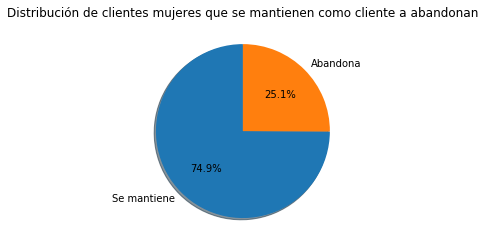

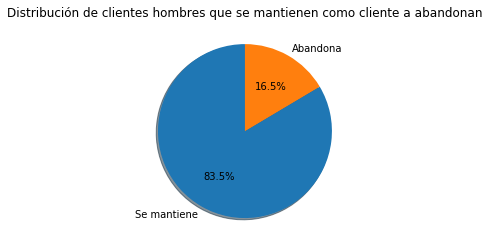

In [36]:
def generarGrafico(fiter_value, title):
    tipos = data_frame['Exited'].unique()
    total = data_frame['Exited'][data_frame.Gender == fiter_value ].value_counts().tolist()
    plt.pie(total, labels=['Se mantiene','Abandona'], autopct='%1.1f%%', shadow=True, startangle=90) 
    plt.title(title)
    plt.show()
    
generarGrafico('Female', 'Distribución de clientes mujeres que se mantienen como cliente a abandonan')
generarGrafico('Male', 'Distribución de clientes hombres que se mantienen como cliente a abandonan')

In [37]:
# Es posible armar tablas
data_frame['Exited'][data_frame.Gender == 'Female' ].value_counts()

0    3404
1    1139
Name: Exited, dtype: int64

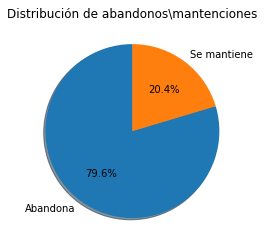

In [11]:
tipos = data_frame['Exited'].unique()
total = data_frame['Exited'].value_counts().tolist()
plt.pie(total, labels=['Abandona','Se mantiene'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Distribución de abandonos\mantenciones')
plt.show()

## Transformación de variables categóricas

Una **variable categórica** es aquella que toma valores desde un conjunto limitado de elementos. 

Se revisarán 3 enfoques para tratar este tipo de variables. Antes de revisarlos es conveniente preguntar ¿por qué deben ser tratadas?, la respuesta: los algoritmos que se revisarán más adelante requieren, muchos de ellos, que las variables sean numéricas.

Los enfoques son:

1. Borrar las variables categóricas. Se aplica cuando la columna no aporta mayor valor al análisis.
2. Etiqueta codificada (Label Encoding(. Asigna a cada valor de la lista un número entero diferente. Se debe tener cuidado porque el orden de los números no necesariamente representa el orden de las categorías.
3. One-hot-encoding. Crea nuevas columnas indicando la presencia (o ausencia) de cada posible valor en el set de datos original.

Antes de comenzar a trabajar con nuestro set de datos, se revisará primero la forma en que trabaja el Label y el one-hot encoding

In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Define example
data = ['frio', 'frio', 'templado', 'frio', 'calor', 'calor', 'templado', 'frio', 'templado', 'calor']
values = array(data)
print('Valores:',values)
# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('Label encoder integer:',integer_encoded)
# Binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('one-hot encoder:\n', onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

Valores: ['frio' 'frio' 'templado' 'frio' 'calor' 'calor' 'templado' 'frio'
 'templado' 'calor']
Label encoder integer: [1 1 2 1 0 0 2 1 2 0]
one-hot encoder:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
['frio']


### Analizando el resultado anterior

La matriz que aparece junto one-hot-encoder es de 3x3; esto es porque se tienen tres valores distintos.

Si se revisa la primera fila: [0 1 0] significa que el primer valor corresponde a frío; es decir, la primera columna representa el valor calor (codificado en 0), la segunda es frio (codificada en 1) y la tercera columna es templado (codificada en 2).

### Selección de las características (columnas) con las cuales se va a trabajar

Como ya se había mencionado anteriormente, muchas veces, se descartan columnas que no tienen mucho aporte en el análisis y, en este caso, se van a seleccionar de forma arbitraria. Sin embargo, en ocasiones es posible seleccionarlas usando un criterio más formal, pro ejemplo, considere la predicción del precio de una vivienda sabiendo que se tienen datos de la vivienda: número de habitaciones, cuenta o no con estacionamiento, número de baños, si se encuentra en condominio o no (incluya otras que se le ocurran); en este caso, sería posible generar un "mapa de calor" para saber la correlación de las variables con la variable de precio de la casa (valor que se quiere predecir), con eso se podrán incluir en el análisis aquellas variables que presenten una correlación más alta.

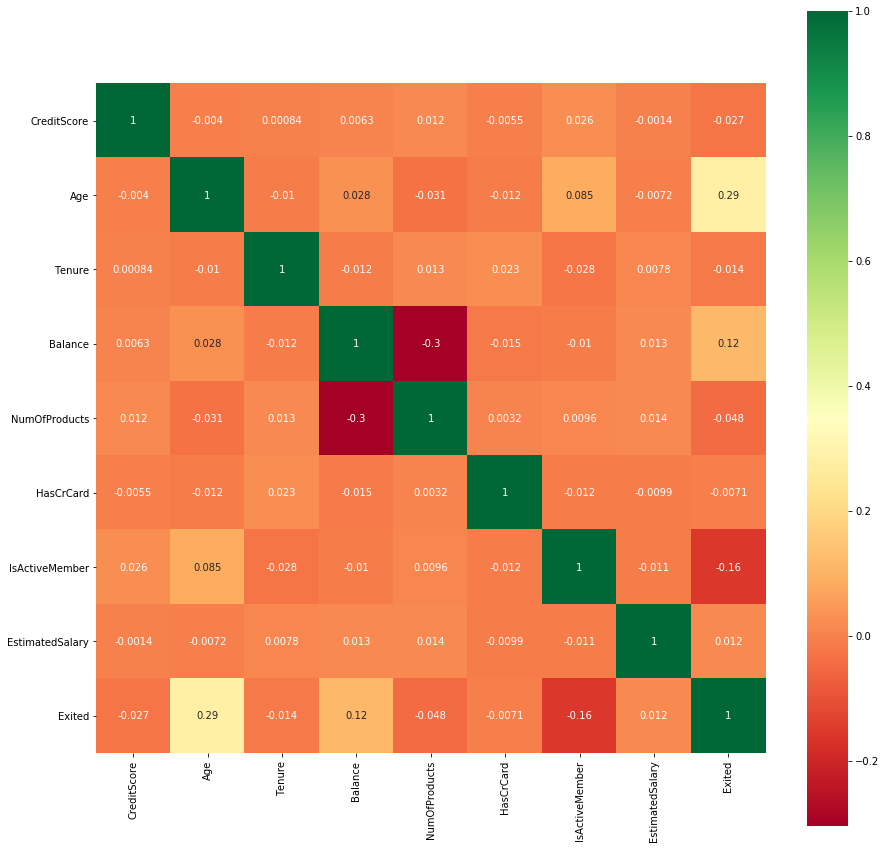

In [19]:
## Correlación de las variables
import seaborn as sns
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

### Pregunta de rigor: ¿por qué no aparecen las columnas del paìs y el género?

La respuesta, porque son columnas con ***valores categóricos***

### Entonces, ¿cómo se pueden incluir?

La respuesta, transformándolas a numéricas

## Transformación

### Primero vamos con la selección de columnas

Se separan en 2 grupos (X e y) pensando un poco en que se trabajará con estos datos pensando en clasificación. En ese caso se separa la columna Exited (sale o se queda) para que el algoritmo pueda clasificar si un determinado cliente, dadas ciertas características, se queda en el banco o se retira.

Es posible también separar, pensando, por ejemplo en predicción, en separar como el grupo y a la columna de EstimatedSalary pensando en predecir el salario estimado, dado un conjunto de características del cliente.

Todo esto se revisará más adelante cuando se revise el ***aprendizaje automático***

In [8]:
# Selecciona solo las características que se van a considerar en los posteriores análisis
X = data_frame.iloc[:, 0:-1].values
# La última columna (sale o no sale) se separa del resto para realizar posteriores análisis
y = data_frame.iloc[:, -1].values

### Revisemos lo que quedo en X y en y

In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,96270.6
9996,516,France,Male,35,10,57369.6,1,1,1,101700
9997,709,France,Female,36,7,0,1,0,1,42085.6
9998,772,Germany,Male,42,3,75075.3,2,1,0,92888.5


#### Contenido de X
En X quedan 10 columnas (CreditScore, Geography, Gender, Age, Tenure, Balance, NroProducts, HasCrCard, isActivedMember, EstimatedSalary)

In [10]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Ahora ya si estamos en condiciones de realizar la transformación

#### Vamos a partir con la columna del género

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,France,0,42,2,0,1,1,1,101349
1,608,Spain,0,41,1,83807.9,1,0,1,112543
2,502,France,0,42,8,159661,3,1,0,113932
3,699,France,0,39,1,0,2,0,0,93826.6
4,850,Spain,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0,2,1,0,96270.6
9996,516,France,1,35,10,57369.6,1,1,1,101700
9997,709,France,0,36,7,0,1,0,1,42085.6
9998,772,Germany,1,42,3,75075.3,2,1,0,92888.5


### Análisis del resultado

La columna queda con valores 0 y 1, representando de esa forma a Female y Male respectivamente. La pregunta es: ***¿por qué en ese orden?***

La respuesta ... usted ya la debería saber considerando lo que comentamos hace un rato atrás

![Respuesta](perro_18.jpg  "Meme") 


### Ahora vamos con la columna del país (la número 2 en X)

Acá vamos a usar el tercer enfoque

In [12]:
# Primero se revisan los valores únicos
pd.DataFrame(X)[1].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Se observan 3 valores distintos, por lo que se espera que se agreguen 3 columnas y que cada una de ellas contenga 0 (ausencia) o 1 (presencia) del valor original

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


## Escalado y normalización

La escala es importante si se necesita especificar que una modificación en una cantidad no es igual a otra modificación en otra. Con la ayuda del escalado, se asegura de que aunque algunas características son grandes no se usarán como predictor principal. Por ejemplo, si se utiliza la edad y el sueldo de una persona en la predicción, algunos algoritmos prestarán más atención al sueldo porque es más grande, lo que no tiene ningún sentido.

La ***normalización*** implica transformar o convertir el conjunto de datos en una distribución normal. Algunos algoritmos como Support Vector Machine (SVM) convergen mucho más rápido en los datos normalizados, por lo que tiene sentido normalizar los datos para obtener mejores resultados.

Hay muchas maneras de realizar el escalado de características. En pocas palabras, se ponen todas las características en la misma escala para que ninguna esté dominada por otra. Es posible utilizar la clase ***StandardScaler*** o ***MinMaxScaler*** del paquete sklearn.preprocessing para ajustar y transformar el conjunto de datos.

El escalador sklearn.preprocessing.MinMaxScaler transforma las características escalándolas a un rango dado, por defecto (0,1), aunque puede ser parametrizado. Este es el tipo de escalado que se conoce, frecuentemente, como ***normalización*** de los datos

Documentación de MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Documentación de StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [14]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()

scaled_data = escalador.fit_transform(X)
pd.DataFrame(scaled_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0,0.0,1.0,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,1.0,0.0,0.0,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,1.0,0.0,0.0,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0,0.0,1.0,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [15]:
# Se comprueba la normalización
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.501400,0.250900,0.247700,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441
std,0.500023,0.433553,0.431698,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977
50%,1.000000,0.000000,0.000000,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960
75%,1.000000,1.000000,0.000000,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
# Guarda los datos limpios y nornalizados para usarlos en un futuro
df_final = pd.DataFrame(scaled_data)
df_final.columns = ['isFrance','isGermany','isSpain', 'CreditScore','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProductos','HasCrCard', 'isActiveMember', 'EstimatedSalary']
df_final['Exited'] = y
df_final.head(10)
df_final.to_csv('Churn_Modelling_Clean_&_normalize.csv', index=False)

### Con los datos limpios y normalizados, se vuelve a generar el mapa de calor para ver la correlación de variables

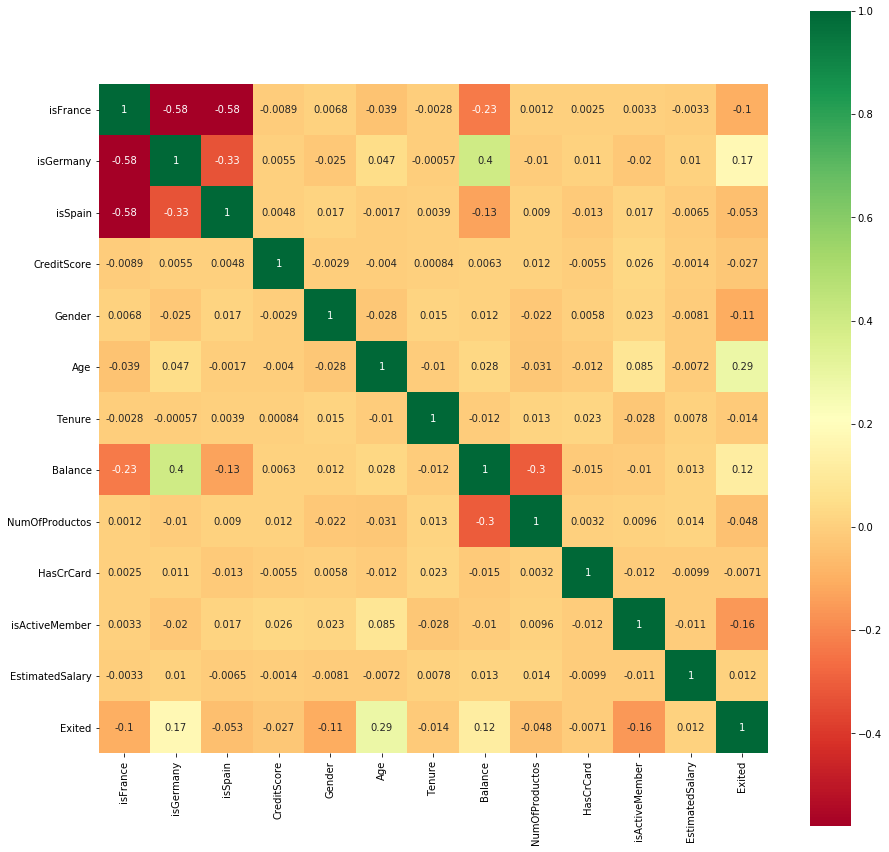

In [20]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(df_final.corr(), annot=True,cmap='RdYlGn',square=True)

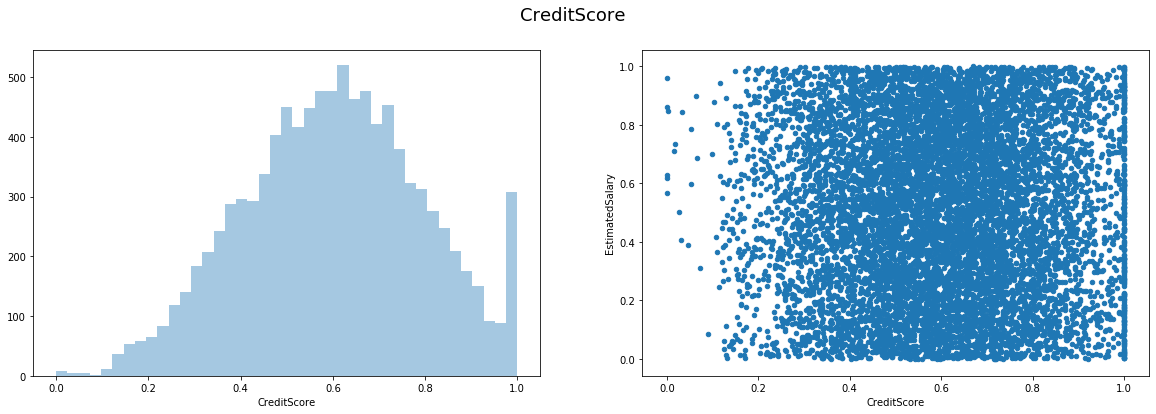

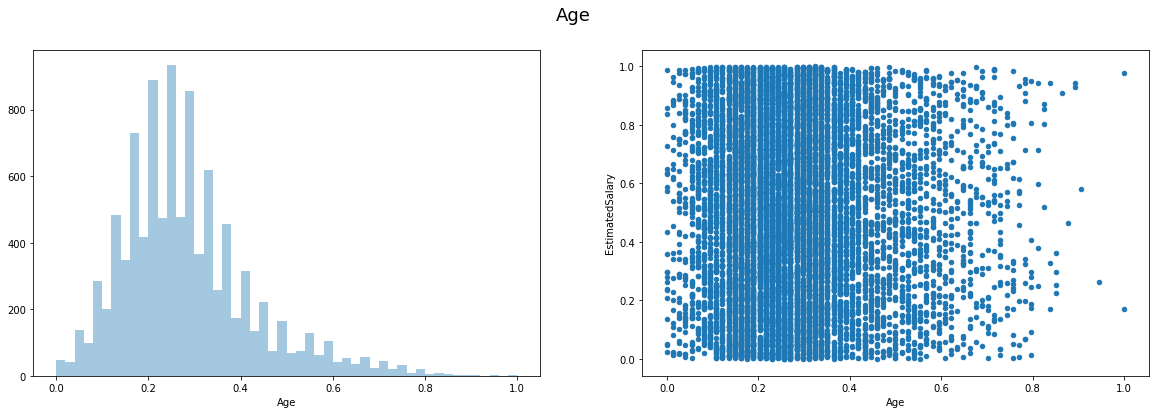

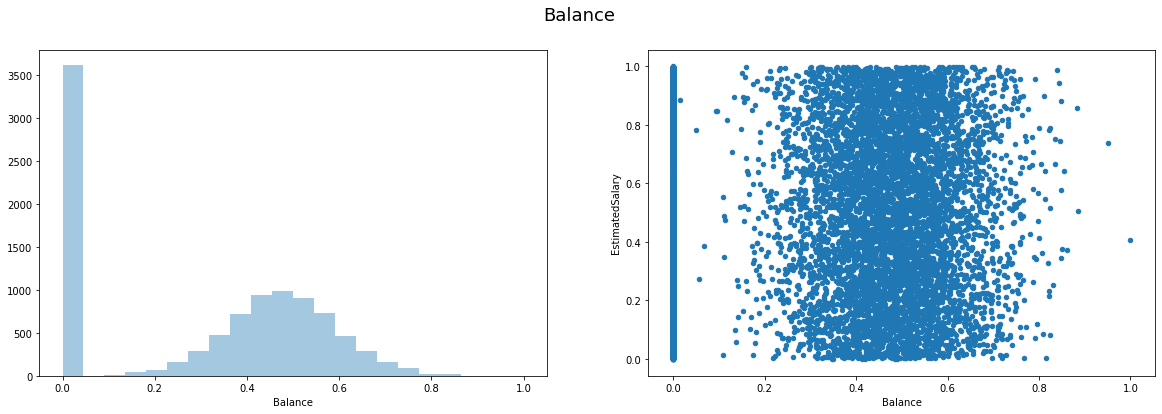

In [22]:
# Visualizamos la distribución de las variables
columnas = ['CreditScore', 'Age', 'Balance']
for col in columnas:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(df_final[col], ax=ax[0], kde=False)
    df_final[[col]+['EstimatedSalary']].plot.scatter(x=col, y='EstimatedSalary', ax=ax[1])
    plt.show()

## Comentarios finales
Los datos, dentro de un proyecto de minería de datos son la materia prima de los algoritmos; esta es la razón por la cual deben ser explorados y tratados.

Se han revisado algunas técnicas de exploración, limpieza y de tratamiento; fases importantes y que ocupan la mayor parte del tiempo de un proyecto de este tipo.

La matemática subyacente en la mayoría de los modelos de Machine Learning asume que los datos son numéricos y no considera los valores que faltan. Además, la librería Scikit Learn retorna un error si se intenta entrenar un modelo como la Regresión Lineal usando datos que contienen valores perdidos o no numéricos.

Los datos se deberían normalizar para evitar que un algoritmo le otorgue más importantacia a una columnas versus otra.